In [1]:
import numpy as np

In [9]:
class ScratchLinearRegression():

    def __init__(self, num_iter, lr, no_bias, verbose): 
        
        self.iter = num_iter
        self.lr = lr
        self.bias = no_bias
        self.verbose = verbose
     
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
      

    def fit(self, X, y, X_val=None, y_val=None):

        
        if self.bias == True:
            bias = np.ones((X.shape[0], 1))
            X = np.hstack((bias, X))
            if X_val is not None:
                bias = np.ones((X_val.shape[0], 1))
                X_val = np.hstack((bias, X_val))
            self.coef_ = np.random.rand(X.shape[1])
            self.coef_ = self.coef_.reshape(X.shape[1], 1)
    

        for epoch in range(self.iter):
            y_pred = self._linear_hypothesis(X)
            self.loss[epoch] = np.mean((y-y_pred)**2)
            
            if X_val is not None:
                pred_val = self._linear_hypothesis(X_val)
                self.val_loss[epoch] = np.mean((y_val-pred_val)**2)
                
            self.coef_ = self._gradient_descent(X, (y_pred-y))
           
            if self.verbose == True:
                print('{}-th epoch train loss {}'.format(epoch, self.loss[epoch]))
                if X_val is not None:
                    print('{}-th epoch val loss {}'.format(epoch, self.val_loss[epoch] ))



    def _linear_hypothesis(self, X):

        pred = X @ self.coef_
        
        return pred


    def _gradient_descent(self, X, error):

        for i in range(X.shape[1]):
            gradient = error*X[:, i]
            self.coef_[i, :] = self.coef_[i, :] - self.lr * np.mean(gradient)

        return self.coef_
        


    def predict(self, X):
        if self.bias == True:
            bias = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([bias, X])
        pred_y = self._linear_hypothesis(X)
        return pred_y


    def _mse(self, y_pred, y):

        mse = np.mean((y-y_pred)**2)
        
        return mse


    def _loss_func(self, pred, y):

        loss = self._mse(pred, y)/2

        return loss

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
dataset = pd.read_csv("import/train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
X = MinMaxScaler().fit_transform(X)
y = np.log(y.values)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [13]:
slr = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=True, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)

0-th epoch train loss 118.24488788526237
0-th epoch val loss 118.50263380290588
1-th epoch train loss 114.57301638143988
1-th epoch val loss 114.81246393469122
2-th epoch train loss 111.01569514100987
2-th epoch val loss 111.23756163514287
3-th epoch train loss 107.56935928953841
3-th epoch val loss 107.77433742682621
4-th epoch train loss 104.23055475798884
4-th epoch val loss 104.41931343800988
5-th epoch train loss 100.99593484072454
5-th epoch val loss 101.1691199352522
6-th epoch train loss 97.86225686039903
6-th epoch val loss 98.0204919636731
7-th epoch train loss 94.82637893641433
7-th epoch val loss 94.97026609156724
8-th epoch train loss 91.88525685373236
8-th epoch val loss 92.01537725611911
9-th epoch train loss 89.03594102892298
9-th epoch val loss 89.15285570708028
10-th epoch train loss 86.27557357042994
10-th epoch val loss 86.3798240453675
11-th epoch train loss 83.60138543012907
11-th epoch val loss 83.69349435363395
12-th epoch train loss 81.0106936433444
12-th epoch

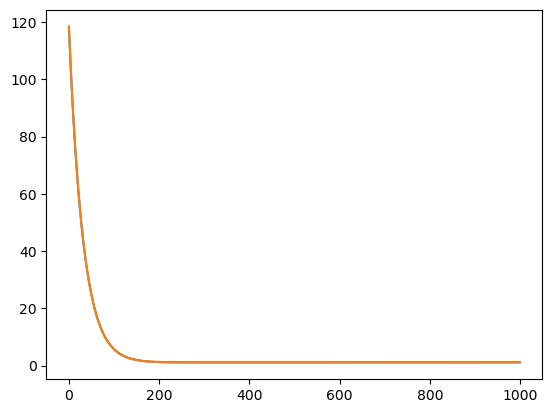

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(slr.loss)
plt.plot(slr.val_loss)

In [16]:
def MSE(y_pred, y):

    mse = np.mean((y-y_pred)**2)
    
    return mse

In [17]:
pred_test = slr.predict(X_test)

In [18]:
MSE(np.exp(pred_test), np.exp(y_test)) 

83805433724.15932